In [1]:
# put all python import statements here
import numpy as np
import solvers as sv
import time 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

## Implementation

The following code is used to implement this system of differential equations to model the predator-prey model:
$$\frac{dx}{dt}=\alpha x - \beta xy + f(t)$$
$$\frac{dx}{dt}=\delta xy - \gamma y + g(t)$$

#### For test case a, 
$$\alpha = \beta = \gamma = \delta = 1$$
$$f(t) = − sin(t) − (cos (t))^2 − cos(t)$$ 
$$g(t) = sin(t) + (cos(t))^2 − cos(t)$$
$$x0 = 2$$
$$y0 = 0$$ 
it should continue for a range of time steps until $$T=2.5\pi$$

#### For test case b,
$$\alpha = 2/3, \beta = 4/3, \gamma = \delta = 1$$
$$f(t) = 0$$
$$g(t) = 0$$
$$x(0) = y(0) = 0.9$$
it should continue for a range of time steps until $$T=30$$

In order to solve these systems of differential equations, I have utilised the midpoint method, the Runge-Kutta method (from solvers) and the Ralston-4 method (from solvers).



In [2]:
# define the midpoint method
def midpoint(rhs, s, dt, initialval):
    """ Midpoint method for solving Different Equations
    
    Args:
        rhs2 (function): function to solve
        s (int): number of steps
        dt (float): time step
        initialval (np.ndarray): initial value of the x and y variables
        
    Returns:
        t (np.ndarray): time array
        y (np.ndarray): function array
    """
    # initialise arrays
    t = np.zeros(s+1)
    y = np.zeros((s+1, 2))
    y[0] = initialval

    # iterate over time steps
    for i in range(s):
        t[i+1] = t[i] + dt
        y[i+1] = y[i] + dt * (rhs(t[i] + dt/2, y[i] + (dt/2) * (rhs(t[i], y[i]))))

    return t, y


In [3]:
# calling the method for test case a
def svmethod_a(T, s, method):
    """This function is used to solve a system of differential equations for test case a.
    
    Args:
        T (float): The time period to solve the equations over.
        s (int): The number of steps to take in the time period.
        method (str): The method to use to solve the equations.
    
    Returns:
        t (np.ndarray): The time values at each step.
        y (np.ndarray): The values of x and y at each step.
        abserrorx (np.ndarray): The absolute error between the value of the method's x and the exact x at each step.
        abserrory (np.ndarray): The absolute error between the value of the method's y and the exact y at each step.
        numx (np.ndarray): The exact solution of x at each step.
        numy (np.ndarray): The exact solution of y at each step.
    """
    # define variables
    alpha, beta, gamma, delta = 1, 1, 1, 1
    dt = T/s

    # define the functions within the equation
    def f(t):
        return -np.sin(t) - (np.cos(t)*np.cos(t)) - np.cos(t)

    def g(t):
        return np.sin(t) + (np.cos(t)*np.cos(t)) - np.cos(t)

    def rhs2(t: np.double, y: np.ndarray) -> np.ndarray:
        return np.array([alpha*y[0] - beta*y[0]*y[1] + f(t), delta*y[0]*y[1] - gamma*y[1] + g(t)])
    
    def x(t):
        return 1 + np.cos(t)
    
    def yfunc(t):
        return 1 - np.cos(t)
    
    # check and call correct method
    if(method == "Midpoint"):
        t, y = midpoint(rhs2, s, dt, np.array([2.0, 0.0]))
    else:
        t, y = sv.solver(rhs2, np.array([2.0, 0.0]), 0.0, dt, T, method)

    # finding any absolute errors
    x_values = [array[0] for array in y]
    y_values = [array[1] for array in y]

    numx = x(t)
    numy = yfunc(t)

    abserrorx = np.abs(numx - x_values)
    abserrory = np.abs(numy - y_values)

    return t, y, abserrorx, abserrory, numx, numy

# calling the method for test case b
def svmethod_b(T, s, method): 
    """This function is used to solve a system of differential equations for test case b.
    
    Args:
        T (float): The time period to solve the equations over.
        s (int): The number of steps to take in the time period.
        method (str): The method to use to solve the equations.
    
    Returns:
        t (np.ndarray): The time values at each step.
        y (np.ndarray): The values of x and y at each step.
    """
    # define variables
    alpha, beta, gamma, delta = 2/3, 4/3, 1, 1
    dt = T/s

    # define the functions within the equation
    def f(t):
        return -np.sin(t) - (np.cos(t)*np.cos(t)) - np.cos(t)

    def g(t):
        return np.sin(t) + (np.cos(t)*np.cos(t)) - np.cos(t)

    def rhs1(t: np.double, y: np.ndarray) -> np.ndarray:
        return np.array([alpha*y[0] - beta*y[0]*y[1] + 0, delta*y[0]*y[1] - gamma*y[1] + 0])
    
    if(method == "Midpoint"):
        t, y = midpoint(rhs1, s, dt, np.array([0.9, 0.9]))
    else:
        # call the solver
        t, y = sv.solver(rhs1, np.array([0.9, 0.9]), 0.0, dt, T, method)

    return t, y

In [4]:
# making graphs
def graph(ta, ya, tb, yb, method):
    """This function is used to create graphs for the test cases.
    
    Args:
        ta (np.ndarray): The time values for test case a.
        ya (np.ndarray): The values of x and y for test case a.
        tb (np.ndarray): The time values for test case b.
        yb (np.ndarray): The values of x and y for test case b.
        method (str): The method used to solve the system of differential equations.

    Returns:
        None
    """
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(2,2, figsize=(10, 10))
            
    # label the axis and title
    axs[0,0].title.set_text(f"Graph of using the {method} method for \n test case a when T/100")
    axs[0, 1].title.set_text(f"Graph of using the {method} method for \n test case b when T/100")
    axs[0,0].set_xlabel("Times") 
    axs[0,0].set_ylabel("Population")
    axs[0,1].set_xlabel("Times") 
    axs[0,1].set_ylabel("Population")

    # plot the results
    axs[0, 0].plot(ta,  [ya[i][0] for i in range(len(yb))] , color="red")
    axs[0, 0].plot(ta,  [ya[i][1] for i in range(len(yb))] , color="blue")
    axs[0, 0].legend(["Prey", "Predator"])
    
    # plot the results
    axs[0, 1].plot(tb,  [yb[i][0] for i in range(len(yb))] , color="red")
    axs[0, 1].plot(tb,  [yb[i][1] for i in range(len(yb))] , color="blue")
    axs[0, 1].legend(["Prey", "Predator"])

    # plot absolute error
    # label the axis and title
    axs[1,0].set_xlabel("Times") 
    axs[1,0].set_ylabel("Error")
    axs[1,1].set_xlabel("Times") 
    axs[1,1].set_ylabel("Error")

    axs[1,0].title.set_text(f"Graph of absolute error for test case a \n x values - {method}")
    axs[1,1].title.set_text(f"Graph of absolute error for test case a \n y values - {method}")

    val = 100

    # plot the results
    for i in range(5):
        t, y, abserrorx, abserrory, numx, numy = svmethod_a(2.5*np.pi, val, method)
        val *= 2

        axs[1, 0].plot(t,  [abserrorx[i] for i in range(len(abserrorx))])
        axs[1, 1].plot(t,  [abserrory[i] for i in range(len(abserrory))])
    
    axs[1, 1].legend(["dt = T/100", "dt = T/200", "dt = T/400", "dt = T/800", "dt = T/1600"])
    axs[1, 0].legend(["dt = T/100", "dt = T/200", "dt = T/400", "dt = T/800", "dt = T/1600"])
    plt.show()

# create a line graph
def computationtime():
    '''This function is used to create a line graph of the computation time for test case a and b.
    
    Args:
        None
        
    Returns:
        None
    '''
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(1,2, figsize=(10, 5))
    
    midpointstimesa = []
    midpointstimesb = []
    r4timesa = []
    r4timesb = []
    rktimesa = []
    rktimesb = []

    x_axis = ["T/100", "T/200", "T/400", "T/800", "T/1600"]

    val = 100
    for i in range(5):
        start_time = time.time()
        t, y, abserrorx, abserrory, numx, numy = svmethod_a(2.5*np.pi, val, "Midpoint")
        end_time = time.time()
        midpointstimesa.append(end_time - start_time)

        start_time = time.time()
        t, y, abserrorx, abserrory, numx, numy = svmethod_a(2.5*np.pi, val, "Runge-Kutta")
        end_time = time.time()
        rktimesa.append(end_time - start_time)

        start_time = time.time()
        t, y, abserrorx, abserrory, numx, numy = svmethod_a(2.5*np.pi, val, "Ralston-4")
        end_time = time.time()
        r4timesa.append(end_time - start_time)

        start_time = time.time()
        t, y = svmethod_b(30, val, "Midpoint")
        end_time = time.time()
        midpointstimesb.append(end_time - start_time)

        start_time = time.time()
        t, y = svmethod_b(30, val, "Runge-Kutta")
        end_time = time.time()
        rktimesb.append(end_time - start_time)

        start_time = time.time()
        t, y = svmethod_b(30, val, "Ralston-4")
        end_time = time.time()
        r4timesb.append(end_time - start_time)

        val *= 2

    # label the axis and title
    axs[0].set_xlabel("Time step")
    axs[0].set_ylabel("Time taken")
    axs[0].title.set_text(f"Graph of computation time for test case a \n for all methods")
    axs[1].set_xlabel("Time step")
    axs[1].set_ylabel("Time taken")
    axs[1].title.set_text(f"Graph of computation time for test case b \n for all methods")

    # plot the results
    axs[0].plot(x_axis, midpointstimesa, color="red")
    axs[0].plot(x_axis, r4timesa, color="blue")
    axs[0].plot(x_axis, rktimesa, color="green")

    axs[1].plot(x_axis, midpointstimesb, color="red")
    axs[1].plot(x_axis, r4timesb, color="blue")
    axs[1].plot(x_axis, rktimesb, color="green")

    axs[0].legend(["Midpoint", "Ralston-4", "Runge-Kutta"])
    axs[1].legend(["Midpoint", "Ralston-4", "Runge-Kutta"])

    plt.show()

# create a table
def table():
    """This function is used to create a table of values for the methods when dt = T/1600.
    
    Args:
        None
        
    Returns:
        df (pandas.DataFrame): The dataframe of values.
    """
    # display data in a table
    t, my, abs_error_x, abs_error_y, numx, numy = svmethod_a(2.5*np.pi, 1600, "Midpoint")

    t, r4y, abs_error_x, abs_error_y, numx, numy = svmethod_a(2.5*np.pi, 1600, "Ralston-4")

    t, rky, abs_error_x, abs_error_y, numx, numy = svmethod_a(2.5*np.pi, 1600, "Runge-Kutta")

    # create a pandas dataframe
    data = {'Iteration': [j for j in range(0, 1601, 64)],
            'Midpoint x value': [my[j][0] for j in range(0, len(my), 64)],
            'Ralston-4 x value': [r4y[j][0] for j in range(0, len(r4y), 64)],
            'Runge-Kutta x value': [rky[j][0] for j in range(0, len(rky), 64)],
            'Accurate x value': [numx[j] for j in range(0, len(numx), 64)],
            'Midpoint y value': [my[j][1] for j in range(0, len(my), 64)],
            'Ralston-4 y value': [r4y[j][1] for j in range(0, len(r4y), 64)],
            'Runge-Kutta y value': [rky[j][1] for j in range(0, len(rky), 64)],
            'Accurate y value': [numy[j] for j in range(0, len(numy), 64)]
            }

    df = pd.DataFrame(data)
    df = df.style.set_caption("Table of values for test case a for all methods when dt = T/1600")

    # display the dataframe
    return df

# create a closed curve 3d graph
def closedcurve():
    '''This function is used to create a 3d closed curve graph for test case b.
    
    Args:
        None
    
    Returns:
        None
    '''
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure(figsize=(15, 15))

    ax1 = fig.add_subplot(221, projection='3d')
    ax2 = fig.add_subplot(222, projection='3d')
    ax3 = fig.add_subplot(223, projection='3d')

    ax1.set_title(f"3D Graph of using the Midpoint method for \n test case b")
    ax2.set_title(f"3D Graph of using the Ralston-4 method for \n test case b")
    ax3.set_title(f"3D Graph of using the Runge-Kutta method for \n test case b")

    val = 100
    for i in range(5):
        t, my = svmethod_b(30, val, "Midpoint")
        t, r4y = svmethod_b(30, val, "Ralston-4")
        t, rky = svmethod_b(30, val, "Runge-Kutta")

        ax1.plot([my[i][0] for i in range(len(my))],  [my[i][1] for i in range(len(my))], np.log2(val))
        ax2.plot([r4y[i][0] for i in range(len(r4y))],  [r4y[i][1] for i in range(len(r4y))], np.log2(val))
        ax3.plot([rky[i][0] for i in range(len(rky))],  [rky[i][1] for i in range(len(rky))], np.log2(val))

        val *= 2

    ax1.set_xlabel("Prey")
    ax1.set_ylabel("Predator")
    ax1.set_zlabel("log2(dt)")
    ax1.legend(["dt = T/100", "dt = T/200", "dt = T/400", "dt = T/800", "dt = T/1600"])
    ax2.set_xlabel("Prey")
    ax2.set_ylabel("Predator")
    ax2.set_zlabel("log2(dt)")
    ax2.legend(["dt = T/100", "dt = T/200", "dt = T/400", "dt = T/800", "dt = T/1600"])
    ax3.set_xlabel("Prey")
    ax3.set_ylabel("Predator")
    ax3.set_zlabel("log2(dt)")
    ax3.legend(["dt = T/100", "dt = T/200", "dt = T/400", "dt = T/800", "dt = T/1600"])

    plt.show()

In [5]:
# main function
def main():
    # test case a - runge kutta
    start_time = time.time()
    ta, ya, rkabserrorx, rkabserrory, numx, numy = svmethod_a(2.5*np.pi, 100, "Runge-Kutta")
    end_time = time.time()
    rktimea = end_time - start_time

    # test case b - runge kutta
    start_time = time.time()
    tb, yb = svmethod_b(30, 100, "Runge-Kutta")
    end_time = time.time()
    rktimeb = end_time - start_time

    graph(ta, ya, tb, yb, "Runge-Kutta")

    # test case a - ralston-4
    start_time = time.time()
    ta, ya, r4abserrorx, r4abserrory, numx, numy = svmethod_a(2.5*np.pi, 100, "Ralston-4")
    end_time = time.time()
    r4timea = end_time - start_time

    # test case b - ralston-4
    start_time = time.time()
    tb, yb = svmethod_b(30, 100, "Ralston-4")
    end_time = time.time()
    r4timeb = end_time - start_time

    graph(ta, ya, tb, yb, "Ralston-4")

    # test case a - midpoint method
    start_time = time.time()
    ta, ya, midabserrorx, midsabserrory, numx, numy = svmethod_a(2.5*np.pi, 100, "Midpoint")
    end_time = time.time()
    mptimea = end_time - start_time

    # test case b - midpoint method
    start_time = time.time()
    tb, yb = svmethod_b(30, 100, "Midpoint")
    end_time = time.time()
    mptimeb = end_time - start_time

    graph(ta, ya, tb, yb, "Midpoint")

    # print out graph of time taken to compute
    computationtime()

    df = table()
    display(df)

    closedcurve()

## Results

In order to present the results of this implementation, created 4 graphs have been created per method. The first graph shows the values of x and y when dt = T/100 for test case a, the second shows the same values when dt = T/100 for test case b, the third shows the absolute error across a range of time steps for values of x and the fourth shows the same but for values for y. 

Furthermore, a line graph has been provided containing the time it took each method to compute test case a and test case b. A table is also provided containing the values of x and y every 64 iterations for each method when dt = T/1600.

A 3D graph is shown containing the values at each dt for predator against prey.


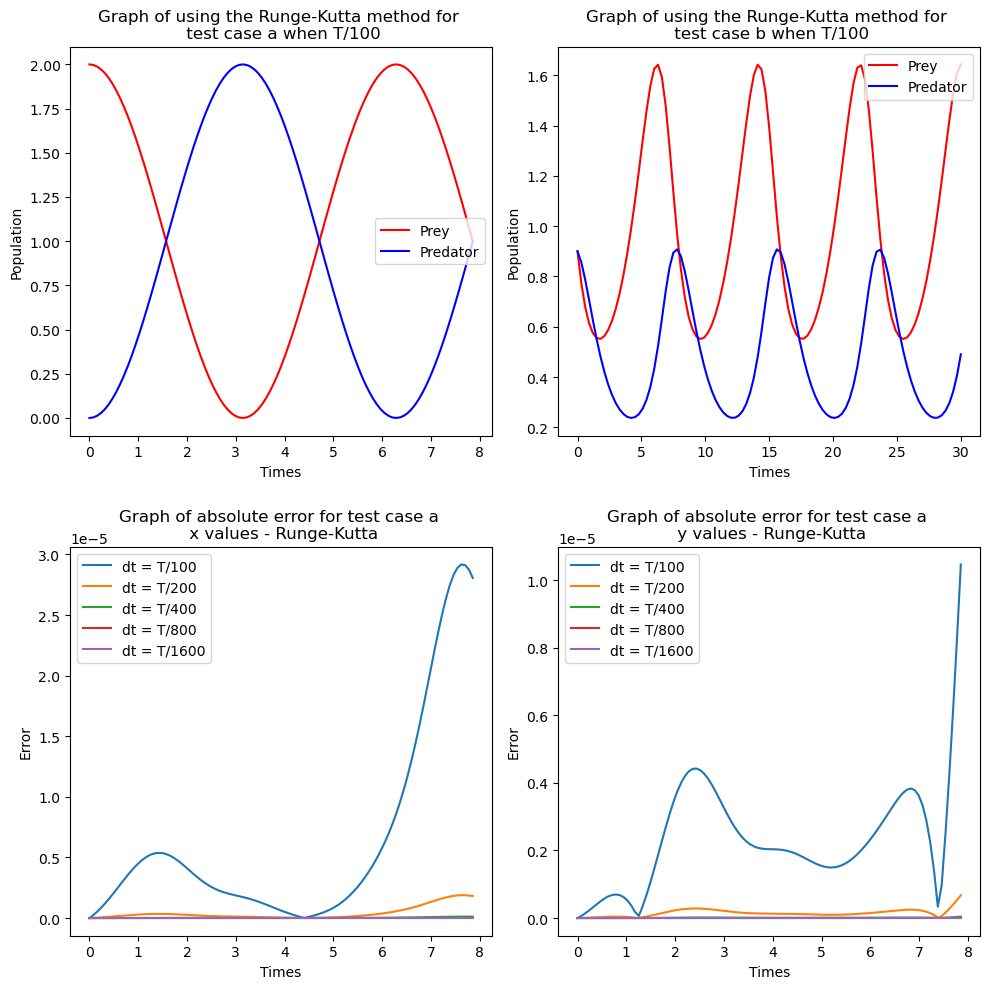

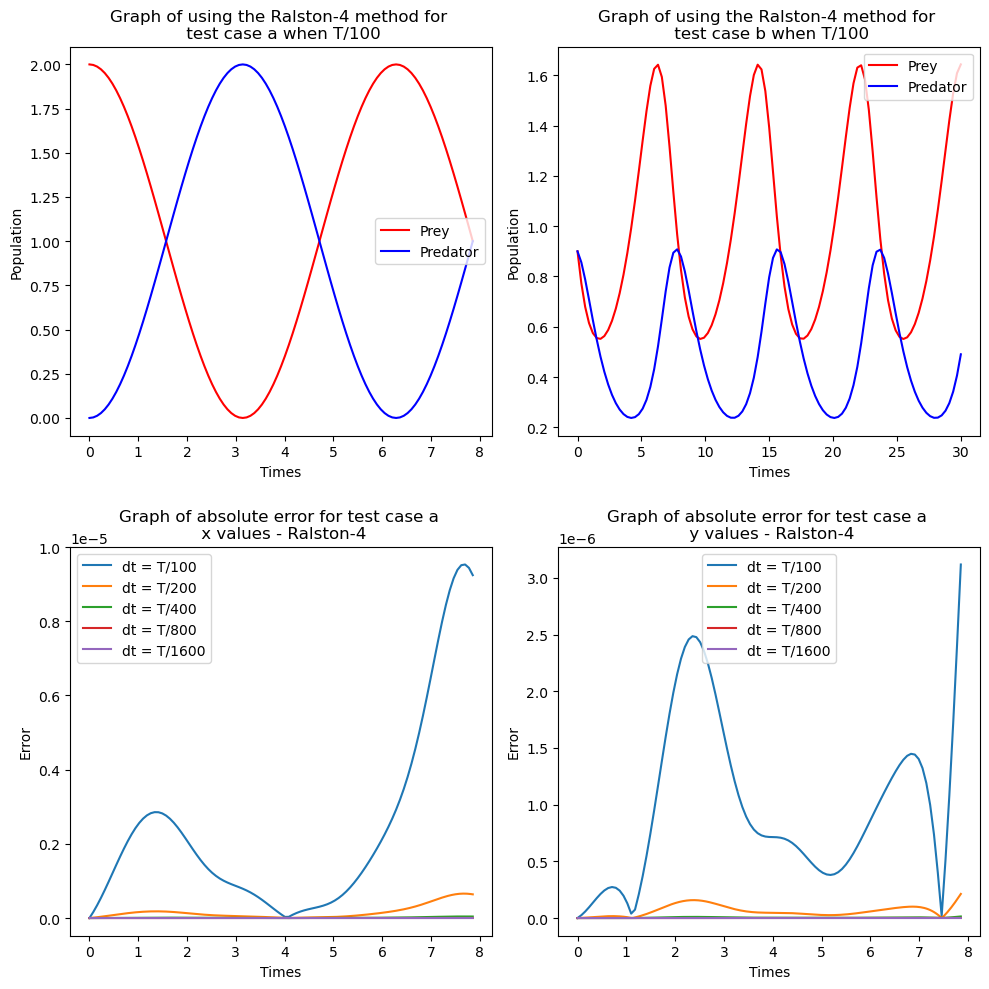

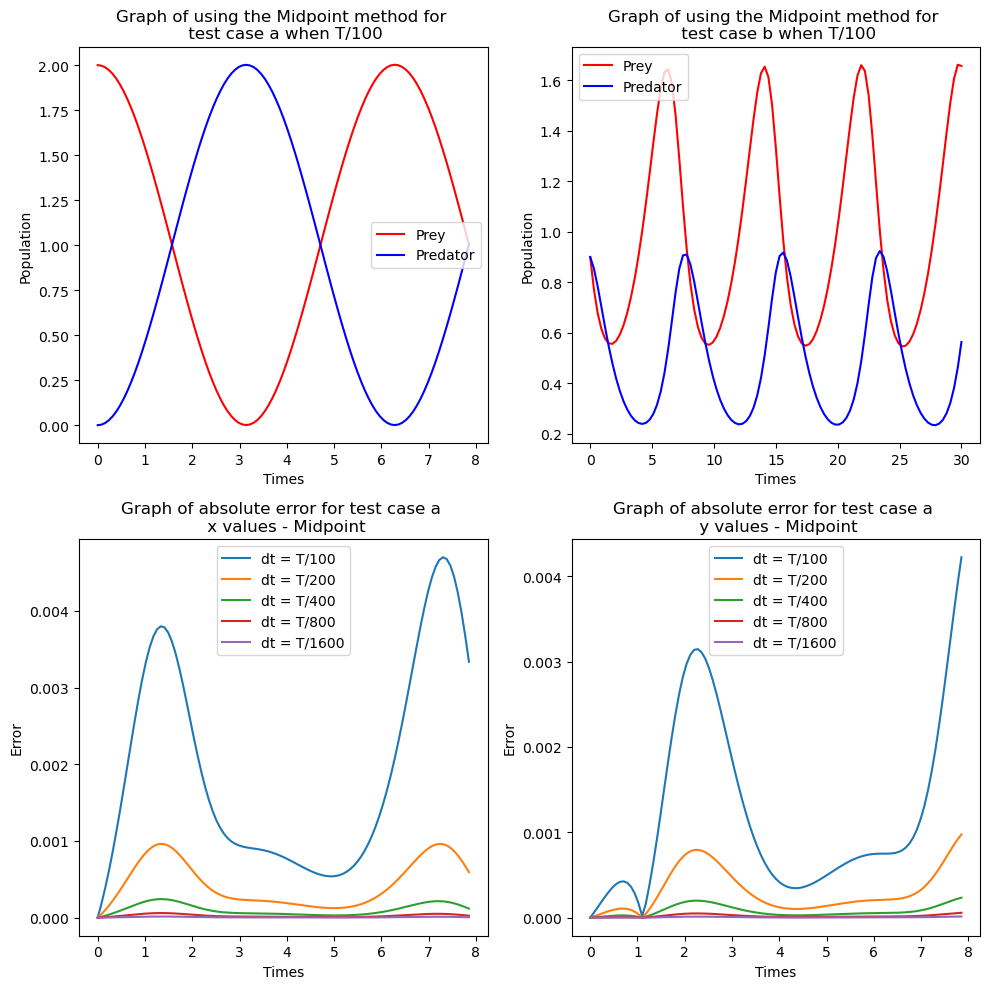

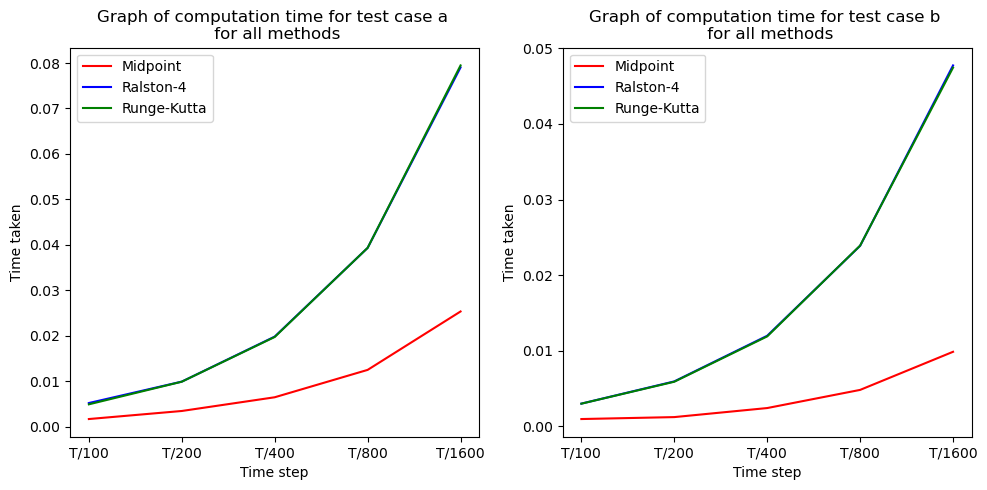

,Iteration,Midpoint x value,Ralston-4 x value,Runge-Kutta x value,Accurate x value,Midpoint y value,Ralston-4 y value,Runge-Kutta y value,Accurate y value
0,0,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
1,64,1.951060,1.951057,1.951057,1.951057,0.048942,0.048943,0.048943,0.048943
2,128,1.809025,1.809017,1.809017,1.809017,0.190981,0.190983,0.190983,0.190983
3,192,1.587798,1.587785,1.587785,1.587785,0.412214,0.412215,0.412215,0.412215
4,256,1.309032,1.309017,1.309017,1.309017,0.690985,0.690983,0.690983,0.690983
5,320,1.000014,1.000000,1.000000,1.000000,1.000006,1.000000,1.000000,1.000000
6,384,0.690994,0.690983,0.690983,0.690983,1.309028,1.309017,1.309017,1.309017
7,448,0.412222,0.412215,0.412215,0.412215,1.587798,1.587785,1.587785,1.587785
8,512,0.190988,0.190983,0.190983,0.190983,1.809029,1.809017,1.809017,1.809017
9,576,0.048947,0.048943,0.048943,0.048943,1.951066,1.951057,1.951057,1.951057


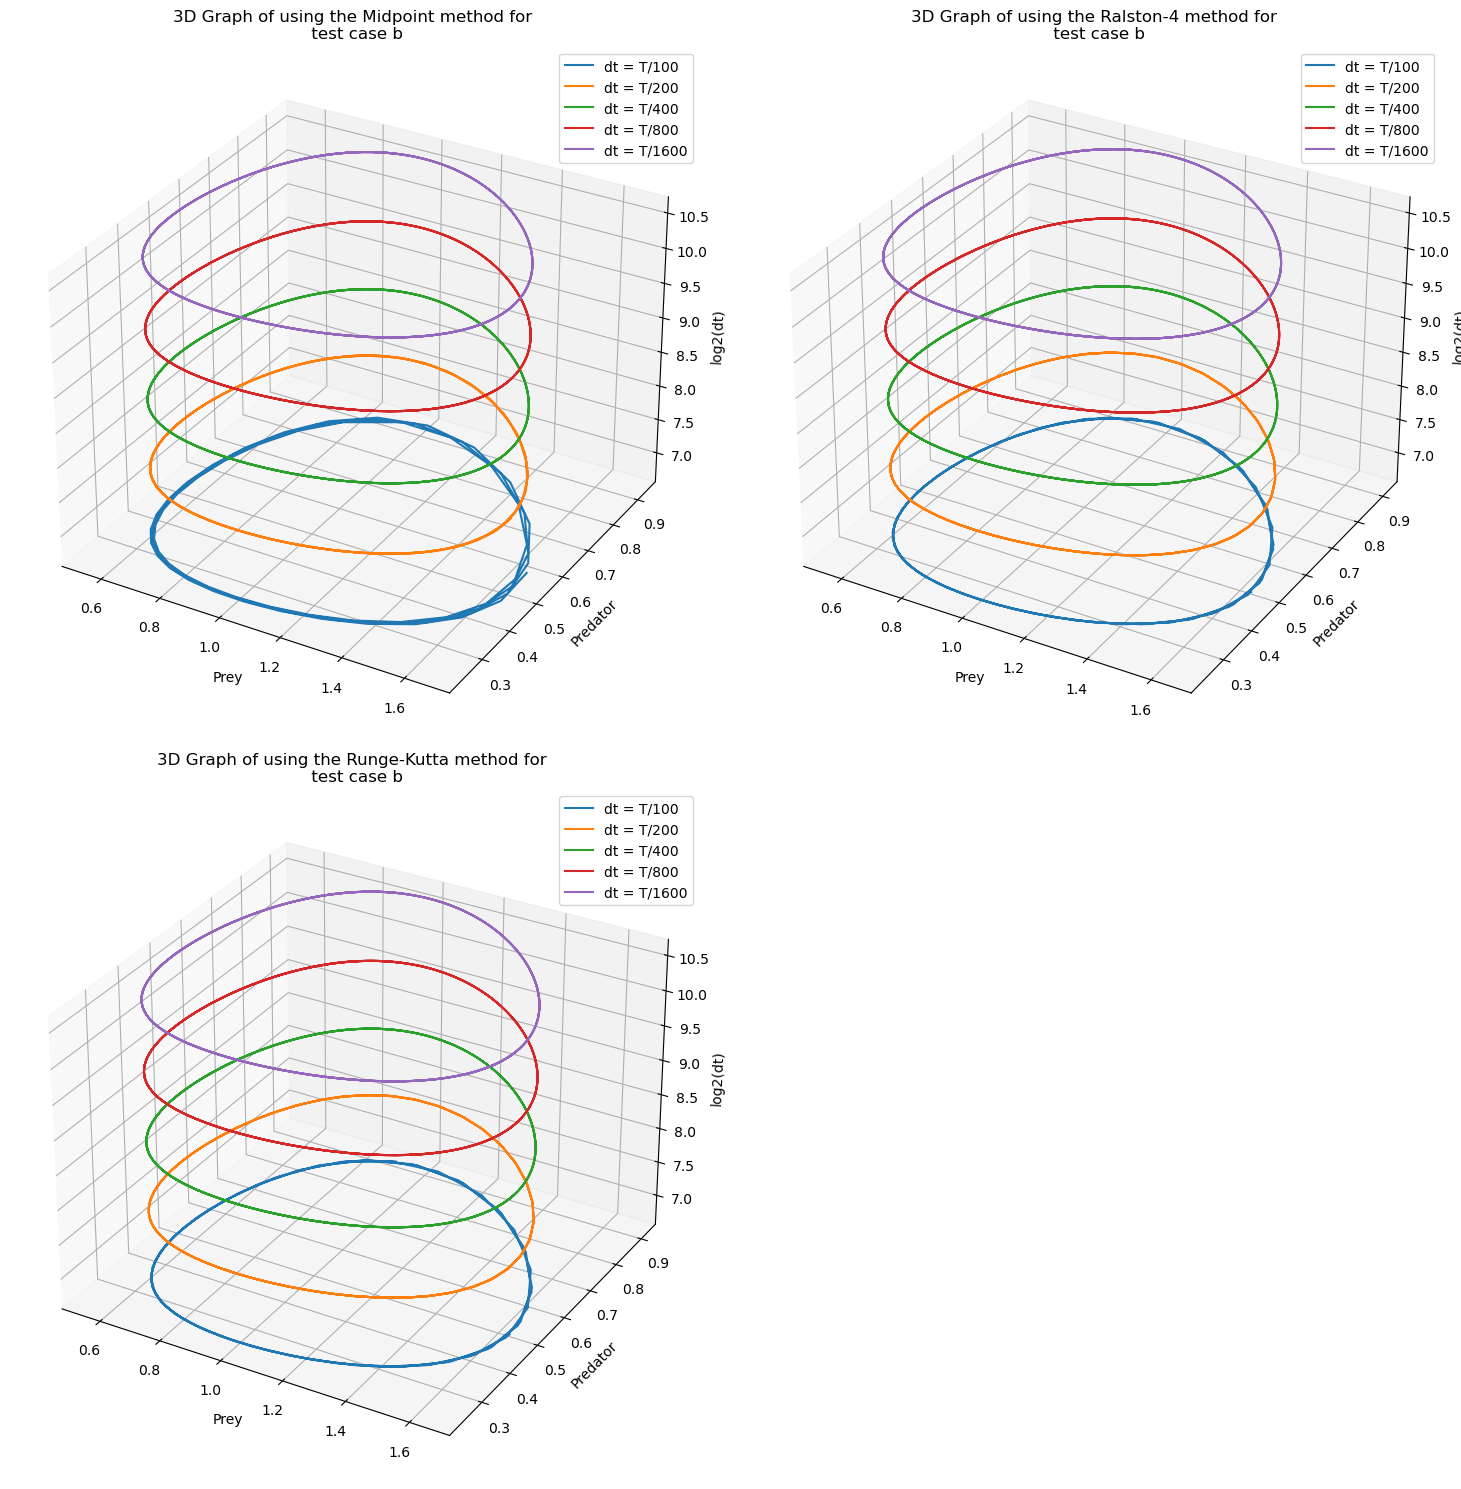

In [6]:
main()

## Analysis

#### Runge-Kutta
The Runge-Kutta method is a higher order method designed to overcome the accuracy problem present within Euler’s method by having more control over all processes that occur within the algorithm (Romeo, 2020).

Within my implementation, Runge-Kutta has absolute error when dt = T/100, with x having up to 3e-5 error whilst y has more than 1.5e-5. However, when dt is smaller, the level of inaccuracy drastically decreases, with values of dt = T/400 or lower having relatively 0 inaccuracy. 

Furthermore, within both test cases Runge-Kutta takes a long amount of time to solve the equations.

This may be due to Runge-Kutta having a large number of variables in order to maintain control - resulting in a trade off between efficiency and accuracy.

#### Ralston-4
The Ralston-4 method is a 4th order Runge-Kutta method for solving differential equations. It calculates a solution by dividing a differential equation into small time steps and calculating an estimate of the solution at each one (Babar). 

Within my implementation, Ralston’s method has an amount of absolute error when dt = T/100 with the error in x values going up to 1e-5 and y going beyond 3e-6. However, the more time steps taken, the less absolute error is present. T/1600 shows 0 absolute error in the table of all values compared to the exact values.

For test cases a and b, the Ralston method takes significantly long to compute.

Ralston-4 is very accurate however has a significant amount of computational complexity, similar to the Runge-Kutta method.

#### Midpoint
The Midpoint method is a second order Runge-Kutta method. It calculates solutions to differential equations by using tangents to calculate an estimate for the next point from the current point (Butt). 

For both x and y, the Midpoint method presents absolute error for all time steps. Furthermore, these errors are extremely high with errors for x going up to 0.005 and y going beyond 0.004. Even when dt = T/1600, errors are presented in the Midpoint method's final solutions as shown by the table of values where x is 0.000006 greater than the exact value and y is 0.000014 greater than the exact value. Furthermore, when plotting predator against prey, for T/100 the circular shape has an irregular amplitude indicating that the Midpoint method is inaccurate.

As shown by the line graph of times taken to compute, for both cases the Midpoint method is able to compute a solution extremely quickly.

As the Midpoint method is relatively simplistic, this may be why it is extremely quick to compute however it has large inaccuracies.

## Conclusion
Within this implementation, the Midpoint method has the worst accuracy with x values being inaccurate with up to 0.005 absolute error and y values being inaccurate with up to 0.004 absolute error. This is significantly higher than the errors within Ralston-4 and Runge-Kutta. The most accurate method is shown to be Ralston-4 as it has a greatly reduced amount of absolute error for all time steps in comparison to the other methods.

Within both test case a and test case b, the Midpoint method took a lot less time to compute. This may be due to the algorithm's simplicity greatly reducing its computational complexity. Both Runge-Kutta and Ralston-4 took similar times to compute, both of which were significantly longer than the time the Midpoint method took to compute.

Implicit solutions may be used instead to solve the system of differential equations. Implicit solutions work by dividing a domain into subdomains then calculating the solutions within time steps (Ecer et al., 2003). This method is useful for computing differential equations as it’s designed with the idea that the equations are not “defined cleanly” (Ricardo, 2021) leading to increasingly accurate solutions.

Overall, I would recommend using the Ralston-4 method to simulate the predator prey model. Although it is quite computationally complex, from the results it has the highest level of accuracy within test case a from which you can interpret it will have a similar level of accuracy once applied to test case b - the more likely predator prey scenario in comparison to the accuracy of Runge-Kutta and the Midpoint method. Furthermore, as the method is still able to solve the differential equations faster than the average human’s cognitive process, it could be argued that it is still efficient. Furthermore, as the predator-prey model is clearly defined the use of Implicit solutions could be argued as being unnecessary. Therefore, I believe the Ralson-4 method is the best option to simulate this model.


## References

- Romeo, G. 2020b. Elements of numerical mathematical economics with Excel: Static and dynamic optimization. London, United Kingdom: Academic Press, an imprint of Elsevier. 
- Babar, Z.A. n.d. Educative answers - trusted answers to developer questions. Educative. [Online]. [Accessed 14 December 2023]. Available from: https://www.educative.io/answers/what-is-the-midpoint-method-in-ordinary-differential-equations. 
- Butt, M. n.d. What is Ralston’s method? Educative. [Online]. [Accessed 15 December 2023]. Available from: https://www.educative.io/answers/what-is-ralstons-method. 
- Ecer, A., Fox, P. and Matsuno, K. 2003. Parallel Computational Fluid Dynamics 2002. North-Holland. 
- Ricardo, H. 2021. A modern introduction to differential equations. London: Academic Press, an imprint of Elsevier. 